# 1. Importing libraries

I will be only using the following libraries only even though it is possible to write them from scratch too but my purpose of writing this notebook is to implement a Random Forest Classifier from scratch.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 2. Importing Data and Initial Analysis

In [2]:
df = pd.read_csv("../input/mobile-price-classification/train.csv")

In [3]:
# First 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


It appears there are 21 columns and we are going to use most of these columns to predict the Price range of the mobile.

Let me explain what each of these columns are so that we can understand what can actually affect the price of the mobile.
* In this data:
    * id: ID
    * battery_power: Total energy a battery can store in one time measured in mAh
    * blue: Has bluetooth or not
    * clock_speed: Speed at which microprocessor executes instructions
    * dual_sim: Has dual sim support or not
    * fc: Front Camera mega pixels
    * four_g: Has 4G or not
    * int_memory: Internal Memory in Gigabytes
    * m_dep: Mobile Depth in cm
    * mobile_wt: Weight of mobile phone
    * n_cores: Number of cores of processor
    * pc: Primary Camera mega pixels
    * px_height: Pixel Resolution Height
    * px_width: Pixel Resolution Width
    * ram: Random Access Memory in Megabytes
    * sc_h: Screen Height of mobile in cm
    * sc_w: Screen Width of mobile in cm
    * talk_time: Longest time that a single battery charge will last when you are
    * three_g: Has 3G or not
    * touch_screen: Has touch screen or not
    * wifi: Has wifi or not


In [4]:
# Shape of dataset
print("Shape of the Dataset is:", df.shape)

Shape of the Dataset is: (2000, 21)


Let's check for any missing values.

In [5]:
# Missing Values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Luckily there aren't any. Now let's find the unique values.

In [6]:
# Unique values count
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict, index=["Unique Values"]).transpose()    

,Unique Values
battery_power,1094
blue,2
clock_speed,26
dual_sim,2
fc,20
four_g,2
int_memory,63
m_dep,10
mobile_wt,121
n_cores,8


This shows is that there are some columns which are categorical and some which are continuous.

In [7]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


# 3. Data Visualization

### How is ram related to price_range?

<Axes: xlabel='ram', ylabel='Density'>

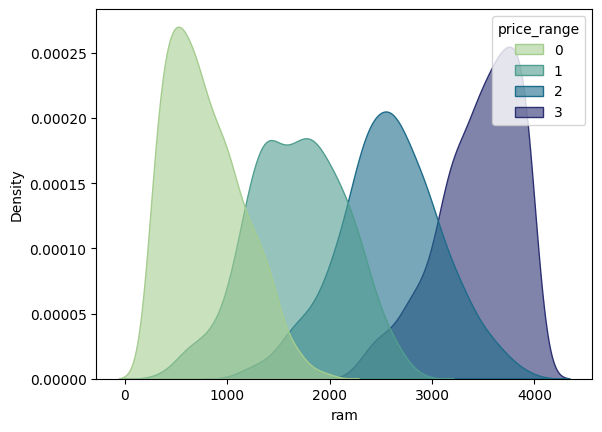

In [9]:
sns.kdeplot(x='ram',hue='price_range',data=df, fill = True, alpha = 0.6, palette = "crest")

### How is Internal Memory related to Price Range?

<Axes: xlabel='int_memory', ylabel='Density'>

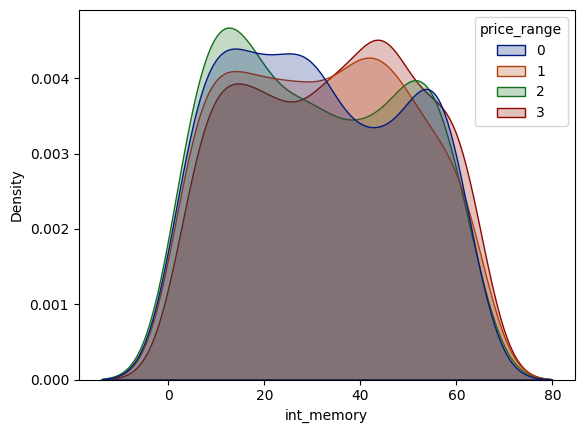

In [10]:
sns.kdeplot(x = "int_memory", hue = "price_range", data = df, fill = True, palette = "dark")

### Percentage of phones which support 3G

In [11]:
labels = ["3G-supported",'Not supported']
values=df['three_g'].value_counts().values

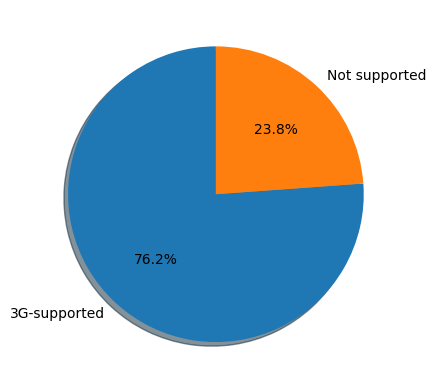

In [12]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

### Percentage of phones which support 4G

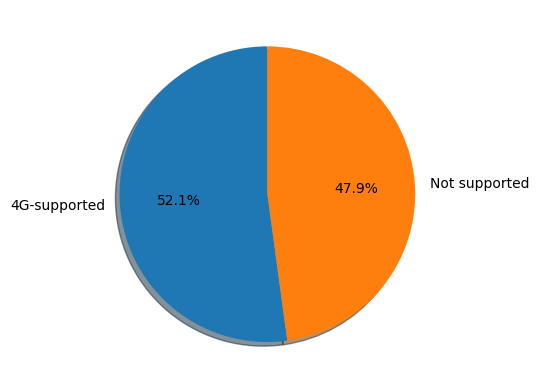

In [13]:
labels_4g = ["4G-supported",'Not supported']
values_4g = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values_4g, labels=labels_4g, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

### How is Battery Power related to Price Range?

<Axes: xlabel='price_range', ylabel='battery_power'>

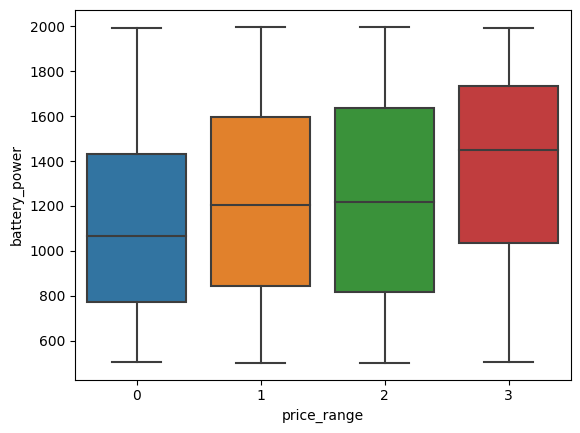

In [14]:
sns.boxplot(x="price_range", y="battery_power", data=df)

### Distribution of Number of phones vs Camera MP of Front and Primary Camera

Text(0.5, 0, 'MegaPixels')

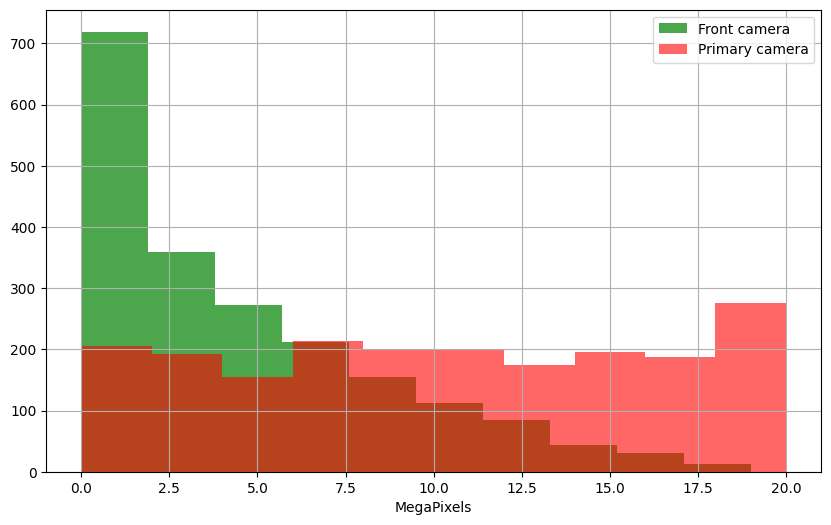

In [15]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.7,color='green',label='Front camera')
df['pc'].hist(alpha=0.6,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### How is Mobile's Weight is related to the Price Range?

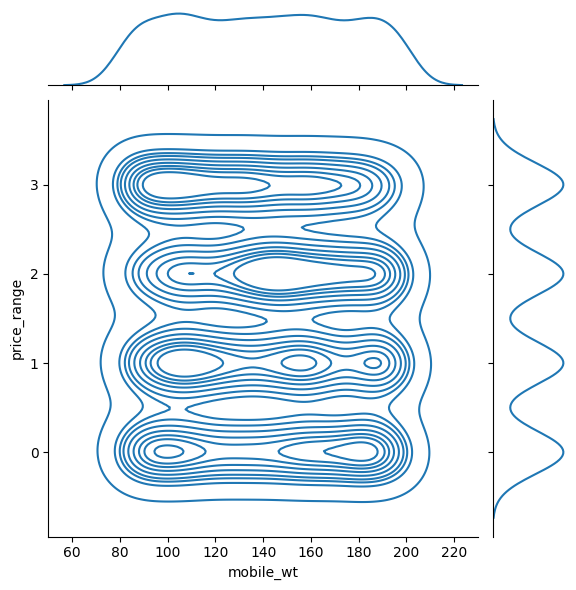

In [16]:
sns.jointplot(x='mobile_wt', y='price_range', data=df, kind='kde')

### Correlation Heatmap

<Axes: >

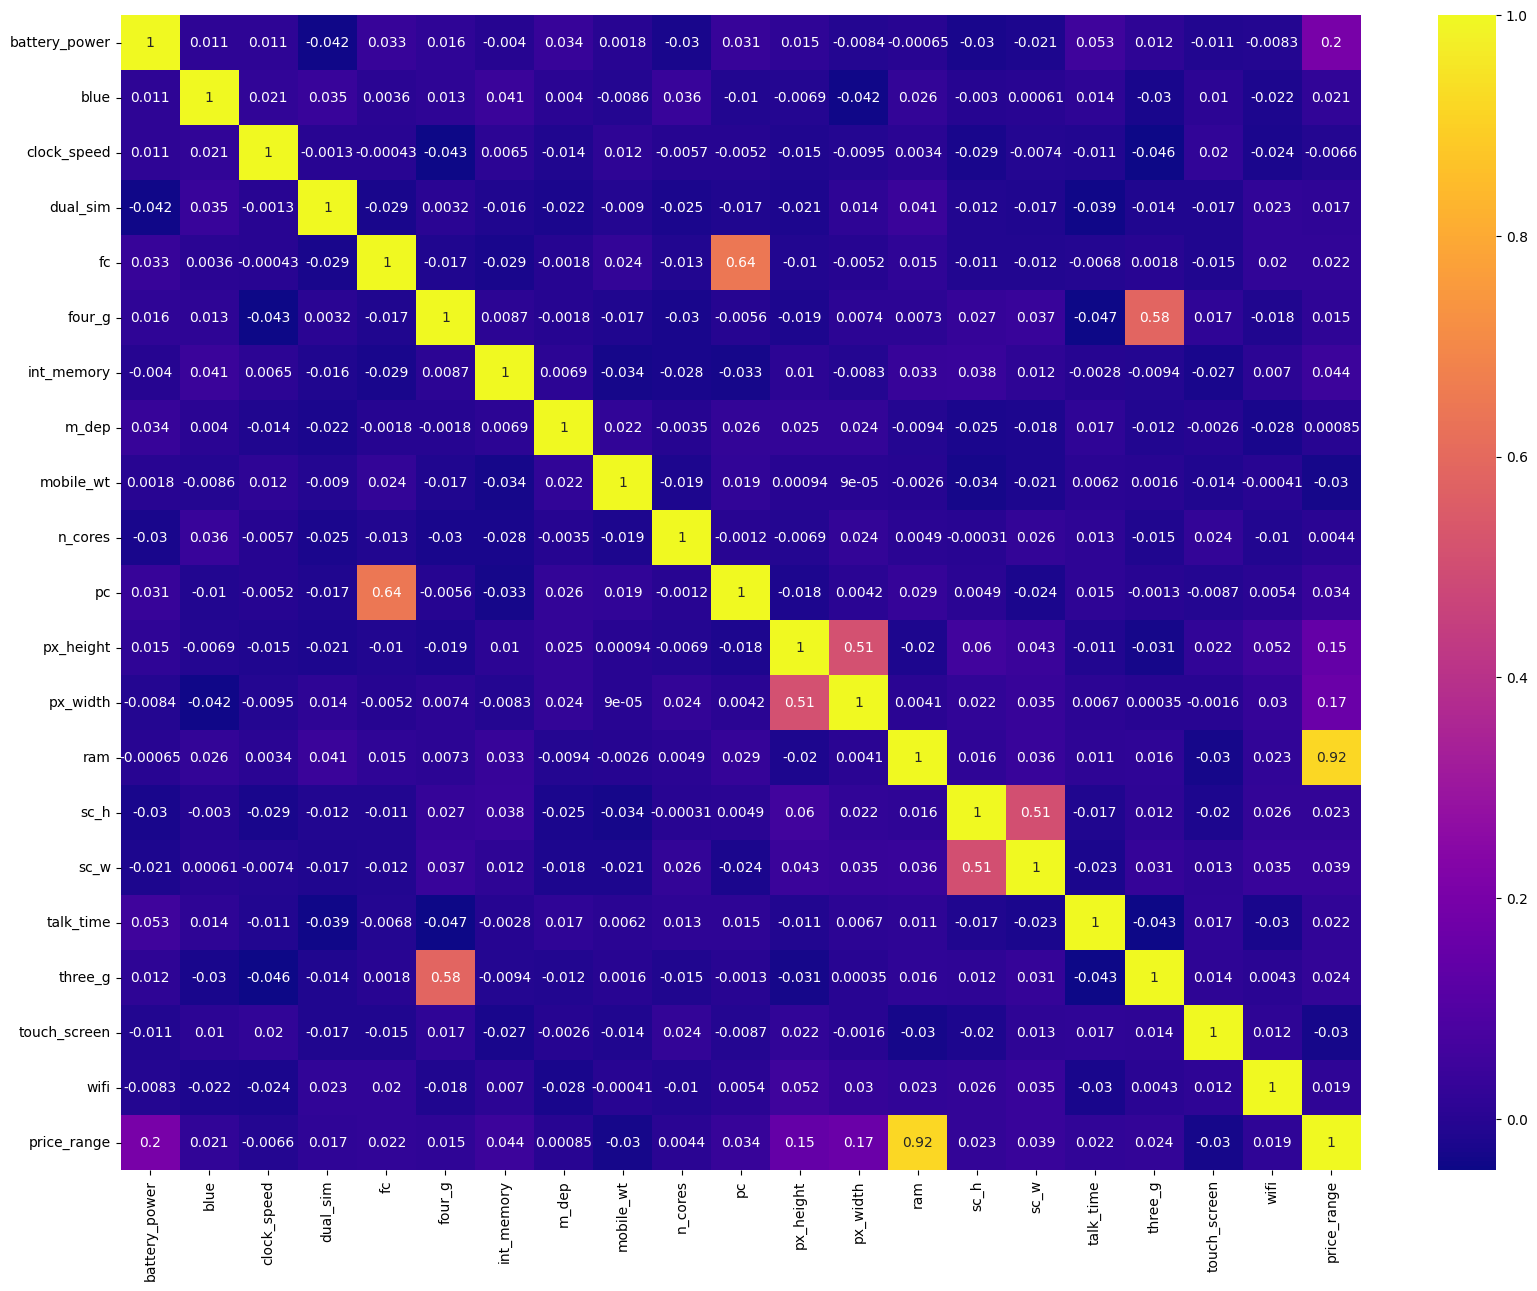

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.plasma)

# 4. Data Preprocessing

In [18]:
X_array = df.drop('price_range', axis=1)
y_array = df['price_range']

In [19]:
X = X_array.values

In [20]:
y = y_array.values

I'll use the train_test_split code from my previous notebook.

In [21]:
def train_test_split(X, y, random_state=123, test_size=0.20):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray or pandas.DataFrame): Features array of shape (n_samples, n_features).
        y (numpy.ndarray or pandas.Series): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray or pandas.DataFrame]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Convert input to numpy arrays if pandas DataFrames or Series are provided
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values

    # Ensure X and y have the same number of samples
    assert X.shape[0] == y.shape[0], "X and y must have the same number of samples."

    # Get number of samples
    n_samples = X.shape[0]

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# 5. Model Implementation

I'm importing this as the **Random Forest** requires **Decision Tree** in its code.

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Random Forest

## Key Concepts

### 1. Gini Impurity:
Gini impurity is a measure of the disorder or uncertainty in a set of labels. It quantifies the probability of incorrectly classifying an instance's label if it were randomly labeled according to the distribution of labels in the set.

Gini impurity $Gini(D)$ of a dataset $D$ with $K$ distinct classes is calculated using the following formula:
$$
Gini(D) = 1 - \sum_{i=1}^k p_i^2
$$
Where $p_{i}$ is the probability of randomly selecting an instance of class $i$ from the dataset $D$.


### 2. Bootstraping:
Bootstraping is the process of creating multiple bootstrap samples(data subsets sampled with replacement) from the original training data. Each bootstrap sample is used to grow a different decision tree in the random forest. This process introduces randomness, which helps reduce overfitting and improves the overall predictive accuracy of the ensemble model compared to a single decision tree. It also allows for estimating the generalization error of the random forest using out-of-bag(OOB) observations.


### 3. OOB score(Out-of-Bag Score):
The OOB score is an internal estimate of the prediction error of a random forest model, calculated using the observations that were not included in the bootstrap samples (i.e., out-of-bag observations) used to build each decision tree.

The formula being implemented in the code is:
$$
OOB Error = 1 - \frac{1}{n} * \sum_{i=1}^{n} I(y_i == y_{pred(i)})
$$
Where **n** is the total number of observations, **$y_i$** is the true target value for observation **i**, **$y_{pred(i)}$** is the prediction from the random forest for observation **i** using only trees where **i** was OOB, **$I(x)$** is an indicator function that returns 1 if $x$ is true, 0 otherwise.

### 4. Most common label:
The most common label (or majority class) in a random forest, or any classification problem, refers to the class or label that occurs most frequently in the target variable (y) of the training data.

### How the algorithm works?
![Random Forest](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/50/f9/ICLH_Diagram_Batch_03_27-RandomForest.component.simple-narrative-xl.ts=1712080356878.png/content/adobe-cms/us/en/topics/random-forest/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/simple_narrative0/image)
1. **Bootstrap Sampling**: The algorithm starts by creating multiple bootstrap samples from the original training data. Each bootstrap sample is created by randomly selecting examples from the training data with replacement, resulting in some examples being duplicated and others being left out.
2. **Decision Tree Construction**: For each bootstrap sample, a decision tree is constructed. This is typically done using a recursive partitioning algorithm, such as the CART (Classification and Regression Trees) algorithm.
3. **Random Feature Selection**: At each node of the decision tree, a random subset of features is selected from the total set of features. This is a key aspect of random forests, as it introduces randomness and reduces the correlation between individual trees, ultimately improving the overall performance of the ensemble.
4. **Node Splitting**: At each node of the decision tree, the algorithm selects the best feature and the best split point from the random subset of features to split the node. This process continues recursively until a stopping criterion is met, such as a maximum tree depth or a minimum number of samples in a leaf node.
5. **Growing the Forest**: Steps 2-4 are repeated for each bootstrap sample, resulting in an ensemble of decision trees, collectively forming the random forest.
6. **Prediction**: To make a prediction for a new data point, the point is passed through each decision tree in the forest. Each tree casts a "vote" for the predicted class or value, and the final prediction is determined by aggregating these votes. For classification tasks, the majority vote across all trees is taken as the predicted class. For regression tasks, the average of the predictions from all trees is used as the final prediction.
7. **Out-of-Bag (OOB) Error Estimation**: During the construction of each tree, the observations that are not included in the bootstrap sample (the out-of-bag observations) can be used to estimate the generalization error of that tree. The OOB error is then averaged across all trees to provide an unbiased estimate of the random forest's generalization error.
8. **Feature Importance**: Random forests can also provide a measure of the importance of each feature in the dataset. This is typically done by evaluating how much the prediction error increases when the values of a particular feature are randomly permuted.

In [24]:
class RandomForest:
    """
    Random Forest Classifier

    Parameters
    ----------
    n_estimators : int, default = 100
        The number of trees in the random forest.
    max_depth : int, default = None
        The maximum depth of each decision tree in the random forest.
        If None, the tree will expand until all leaves contain less than min_samples_split samples.
    min_samples_split : int, default = 2
        The minimum number of samples required to split an internal node.
    min_samples_leaf : int, default = 1
        The minimum number of samples required to be at a leaf node.
    max_features : {'auto', 'sqrt', 'log2'} or int, default='auto'
        The number of features to consider when looking for the best split.
        - 'auto' uses `sqrt(n_features)`.
        - 'sqrt' uses `sqrt(n_features)`.
        - 'log2' uses `log2(n_features)`.
        - If int, use `max_features` as the maximum number of features.
    bootstrap : bool, default=True
        Whether bootstrap samples are used when building trees.
    oob_score : bool, default=True
        Whether to use out-of-bag samples to estimate the generalization score.
    random_state : int, default=None
        The seed used by the random number generator.

    Attributes
    ----------
    n_estimators : int
    max_depth : int
    min_samples_split : int
    min_samples_leaf : int
    max_features : {'auto', 'sqrt', 'log2'} or int
    bootstrap : bool
    oob_score : bool
    random_state : int
    trees: list of DecisionTreeClassifier
    criterion (str): The function to measure the quality of a split. Default is 'gini'.
    """

    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1,
                 max_features='auto', bootstrap=True, oob_score=True, random_state=None, criterion='gini'):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.oob_score = oob_score
        self.random_state = random_state
        self.trees = []
        self.criterion = criterion

    def fit(self, X, y):
        """
        Build a random forest classifier from the training set (X, y).

        Parameters
        ----------
        X : array of shape (n_samples, n_features)
            The training input samples.
        y : array of shape (n_samples, )
            The target values.

        Returns
        -------
        self : object
            Returns self.
        """
        # Create an empty list to store the trees.
        self.trees = []

        # Concatenate X and y into a single dataset.
        dataset = np.concatenate((X, y.reshape(-1, 1)), axis=1)

        # Loop over the number of trees.
        for _ in range(self.n_estimators):
            # Create a decision tree instance.
            tree = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_split=self.min_samples_split,
                                          min_samples_leaf=self.min_samples_leaf, max_features=self.max_features,
                                          criterion=self.criterion, random_state=self.random_state)
            # Sample from the dataset with replacement (bootstrapping).
            dataset_sample = self.bootstrap_samples(dataset)
            # Get the X and y samples from the dataset sample.
            X_sample, y_sample = dataset_sample[:, :-1], dataset_sample[:, -1]
            # Fit the tree to the X and y samples.
            tree.fit(X_sample, y_sample)
            # Store the tree in the list of trees.
            self.trees.append(tree)

        if self.oob_score:
            self.oob_score_ = self.calculate_oob_score(X, y)

        return self

    def bootstrap_samples(self, dataset):
        """
        Bootstrap the dataset by sampling from it with replacement.

        Parameters
        ----------
        dataset : array of shape (n_samples, n_features + 1(target))
            The dataset to bootstrap

        Returns
        -------
        dataset_sample : array of shape (n_samples, n_features + 1(target))
            The bootstrapped dataset sample.
        """
        # Get the number of samples in the dataset.
        n_samples = dataset.shape[0]
        # Generate random indices to index into the dataset with replacement.
        np.random.seed(self.random_state)
        indices = np.random.choice(n_samples, n_samples, replace=True)
        # Return the bootstrapped dataset sample using the generated indices.
        dataset_sample = dataset[indices]
        return dataset_sample

    def calculate_oob_score(self, X, y):
        """
        Calculate the out-of-bag (OOB) score.

        Parameters
        ----------
        X : array of shape (n_samples, n_features)
            The input samples.
        y : array of shape (n_samples, )
            The target values.

        Returns
        -------
        oob_score : float
            The out-of-bag score.
        """
        oob_predictions = np.zeros_like(y, dtype=y.dtype)
        n_samples = X.shape[0]

        for i in range(self.n_estimators):
            tree = self.trees[i]
            unsampled_indices = [j for j in range(n_samples) if j not in self.bootstrap_samples(np.arange(n_samples))]
            oob_predictions[unsampled_indices] += tree.predict(X[unsampled_indices]).astype(y.dtype)

        oob_predictions = np.round(oob_predictions / self.n_estimators).astype(y.dtype)
        oob_score = (y == oob_predictions).mean()
        return oob_score
    
    def predict(self, X):
        """
        Predict class for X.

        Parameters
        ----------
        X : array of shape (n_samples, n_features)
            The input samples

        Returns
        -------
        majority_predictions : array of shape (n_samples)
            The predicted classes.
        """
        # Get prediction from each tree in the tree list on the test data
        predictions = np.array([tree.predict(X) for tree in self.trees])
        # Get prediction for the same sample from all trees for each sample in the test data
        preds = np.swapaxes(predictions, 0, 1)
        # Get the most voted value by the trees and store it in the final predictions array
        majority_predictions = np.array([self.most_common_label(pred) for pred in preds])

        return majority_predictions

    def most_common_label(self, y):
        """
        Returns the most common label in an array of labels.

        Parameters
        ----------
        y : array of shape (n_samples, )
             The array of labels(target).

        Returns
        -------
        most_occuring_value : int or float
            The most common label in the array.
        """
        y = list(y)
        # Get the highest present class in the array
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value

In [25]:
model = RandomForest(min_samples_split=5, n_estimators=150)
model.fit(X_train, y_train)

predictions = model.predict(X_test) #evaluate the model on the test data

# 6. Model Evaluation

In [26]:
def accuracy(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    y_true (numpy array): A numpy array of true labels for each data point.
    y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    float: The accuracy of the model, expressed as a percentage.
    """
    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples)

In [27]:
def confusion_matrix(y_true, y_pred):
        """
        Computes the confusion matrix.

        Parameters:
            y_true (array-like): True labels.
            y_pred (array-like): Predicted labels.

        Returns:
            ndarray: Confusion matrix.
        """
        classes = np.unique(np.concatenate((y_true, y_pred)))
        num_classes = len(classes)
        cm = np.zeros((num_classes, num_classes), dtype=int)
        for i in range(len(y_true)):
            true_label_index = np.where(classes == y_true[i])[0][0]
            pred_label_index = np.where(classes == y_pred[i])[0][0]
            cm[true_label_index][pred_label_index] += 1
        return cm

In [28]:
def classification_report(y_true, y_pred):
        """
        Computes the classification report.

        Parameters:
            y_true (array-like): True labels.
            y_pred (array-like): Predicted labels.

        Returns:
            str: Classification report.
        """
        cm = confusion_matrix(y_true, y_pred)
        classes = np.unique(np.concatenate((y_true, y_pred)))
        num_classes = len(classes)

        report = "              precision    recall  f1-score   support\n\n"
        for i in range(num_classes):
            precision = cm[i][i] / sum(cm[:, i]) if sum(cm[:, i]) > 0 else 0
            recall = cm[i][i] / sum(cm[i, :]) if sum(cm[i, :]) > 0 else 0
            f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            support = sum(cm[i, :])
            report += f"Class {classes[i]}     {precision:.2f}       {recall:.2f}      {f1_score:.2f}       {support}\n"

        return report

In [29]:
rf_conf_matrix = confusion_matrix(y_test, predictions)
rf_acc_score = accuracy(y_test, predictions)
acc = accuracy(y_test, predictions)

print("Accuracy of the Random Forest is:", acc * 100, "%")
print(rf_conf_matrix)
print(classification_report(y_test, predictions))

Accuracy of the Random Forest is: 85.60606060606061 %
[[149   9   0   0]
 [ 13 135   4   0]
 [  0  34 143  22]
 [  0   0  13 138]]
              precision    recall  f1-score   support

Class 0.0     0.92       0.94      0.93       158
Class 1.0     0.76       0.89      0.82       152
Class 2.0     0.89       0.72      0.80       199
Class 3.0     0.86       0.91      0.89       151



We can see that the accuracy comes out to be around 87%!! Even the f1-score is good!